In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/Colab Data/BNC_BLX, 1W.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(data_path)
df.head()

,time,open,high,low,close,Volume,Volume MA
0,2010-07-12T00:00:00Z,0.059410,0.08585,0.059410,0.08584,75.010,NaN
1,2010-07-19T00:00:00Z,0.090900,0.09307,0.050500,0.05050,8021.300,NaN
2,2010-07-26T00:00:00Z,0.050000,0.06990,0.050000,0.06110,26343.570,NaN
3,2010-08-02T00:00:00Z,0.062622,0.06500,0.057282,0.06090,28163.530,NaN
4,2010-08-09T00:00:00Z,0.059527,0.07541,0.059527,0.06529,43523.806,NaN


In [ ]:
df.shape

(569, 7)

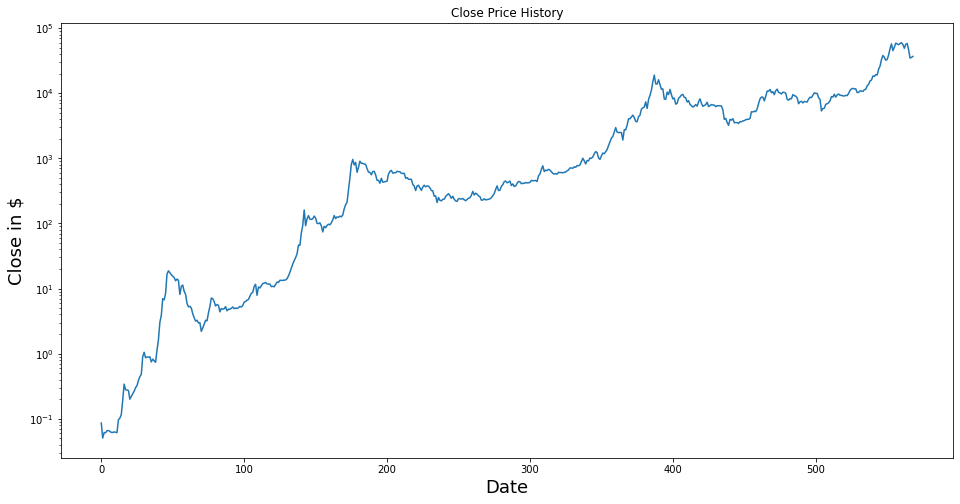

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close in $', fontsize=18)
plt.yscale('log')
plt.show()

In [ ]:
data = df.filter(['close'])
dataset = data.values

In [ ]:
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

456

In [ ]:
scaler = MinMaxScaler(range(0,100))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0 : training_data_len, :]

x_train = []
y_train = []

len_val = 26

for i in range(len_val, len(train_data)):
    x_train.append(train_data[i - len_val: i, 0])
    y_train.append(train_data[i, 0])

    if i <= len_val :
        print(x_train)
        print(y_train)
        print

[array([5.89767905e-07, 0.00000000e+00, 1.76896995e-07, 1.73559315e-07,
       2.46821373e-07, 2.58670134e-07, 2.25293342e-07, 1.85904556e-07,
       1.83572353e-07, 2.03598428e-07, 1.92278856e-07, 1.77063879e-07,
       7.67666203e-07, 8.59452379e-07, 1.07656841e-06, 2.36975219e-06,
       4.83129056e-06, 3.81396596e-06, 3.77574953e-06, 3.68099332e-06,
       2.48696831e-06, 2.82548441e-06, 3.16411983e-06, 3.56631016e-06,
       4.16325408e-06, 4.54758783e-06])]
[5.612140595894048e-06]


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(430, 26)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(430, 26, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
430/430 [==============================] - 9s 14ms/step - loss: 7.8510e-04
Epoch 2/5
430/430 [==============================] - 6s 13ms/step - loss: 4.1136e-04
Epoch 3/5
430/430 [==============================] - 6s 14ms/step - loss: 3.6672e-04
Epoch 4/5
430/430 [==============================] - 6s 14ms/step - loss: 3.0758e-04
Epoch 5/5
430/430 [==============================] - 6s 14ms/step - loss: 2.4000e-04


In [ ]:
test_data = dataset[training_data_len - len_val :, :]

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :]

In [ ]:
for i in range(len_val, len(test_data)):
    x_test.append(test_data[i - len_val: i, 0])

In [ ]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
y_pred = model.predict(x_test)


x_pred = model.predict(x_train)


In [ ]:
x_pred.shape

(430, 1)

In [ ]:
y_pred.shape

(113, 1)

In [ ]:
rmse = np.sqrt(np.mean(y_pred - y_test)**2)
rmse

17518.079798738825

In [ ]:
train = data[len_val:training_data_len]
test = data[training_data_len:]

In [ ]:
train.shape

(430, 1)

In [ ]:
train.head()

,close
26,0.386790
27,0.442400
28,0.479878
29,0.898335
30,1.050000


In [ ]:
train.tail()

,close
451,3921.152857
452,3988.903902
453,3985.721498
454,4108.788168
455,5202.100844


In [ ]:
test.shape

(113, 1)

In [ ]:
train['pred'] = x_pred
test['pred'] = y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


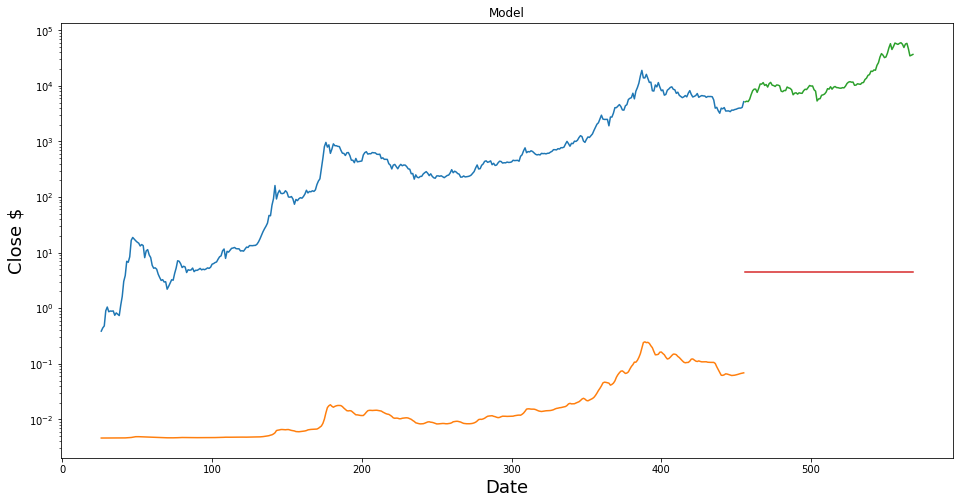

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close $', fontsize=18)
plt.yscale(value='log')
plt.plot(train[['close', 'pred']])
plt.plot(test[['close', 'pred']])
plt.show()